#Carregar a Base de Dados Fashion-Mnist

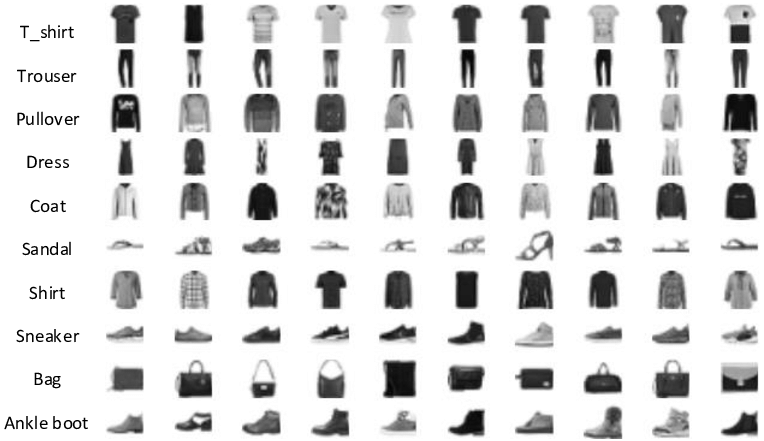

In [1]:
from keras.datasets import fashion_mnist

# Carregar dados
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Verificar as formas dos dados
print(f'Train data shape: {x_train.shape}')
print(f'Test data shape: {x_test.shape}')
print(f'Train labels shape: {y_train.shape}')
print(f'Test labels shape: {y_test.shape}')

4422102/4422102 [==============================] - 0s 0us/step
Train data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Train labels shape: (60000,)
Test labels shape: (10000,)


In [2]:
from sklearn.model_selection import train_test_split

# Selecionar 10% dos conjuntos de forma estratificada
x_train, _, y_train, _ = train_test_split(x_train, y_train, test_size=0.95, stratify=y_train, random_state=42)
x_test, _, y_test, _ = train_test_split(x_test, y_test, test_size=0.95, stratify=y_test, random_state=42)

print(f'Train data shape: {x_train.shape}')
print(f'Test data shape: {x_test.shape}')
print(f'Train labels shape: {y_train.shape}')
print(f'Test labels shape: {y_test.shape}')

Train data shape: (3000, 28, 28)
Test data shape: (500, 28, 28)
Train labels shape: (3000,)
Test labels shape: (500,)


In [3]:
import numpy as np

class_names = ['T-shirt or top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Função para mapear os labels numéricos para os nomes das classes
def map_labels_to_class_names(labels, class_names):
    return np.array([class_names[label] for label in labels])

# Mapear os labels de treino e teste para os nomes das classes
y_train = map_labels_to_class_names(y_train, class_names)
y_test = map_labels_to_class_names(y_test, class_names)

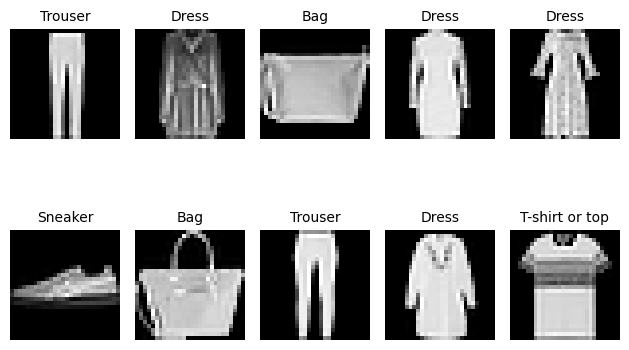

In [4]:
import matplotlib.pyplot as plt

for i in range(10):
  image = x_test[i]
  true_label = y_test[i]

  plt.subplot(2, 5, i + 1)
  plt.imshow(image, cmap='gray')
  plt.title(f'{true_label}', fontsize=10)
  plt.axis('off')
plt.tight_layout()
plt.show()

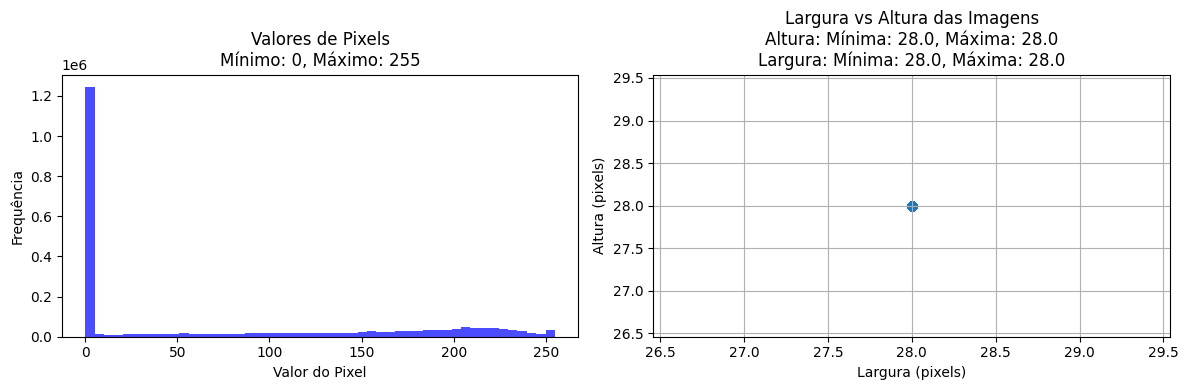

In [5]:
# Obter valores mínimos e máximos dos pixels
pixel_min = np.min(x_train)
pixel_max = np.max(x_train)

# Obter dimensões das imagens
image_heights = x_train.shape[1] * np.ones(x_train.shape[0])
image_widths = x_train.shape[2] * np.ones(x_train.shape[0])

# Plotar valores mínimos e máximos dos pixels
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(x_train.flatten(), bins=50, color='blue', alpha=0.7)
plt.title(f'Valores de Pixels\nMínimo: {pixel_min}, Máximo: {pixel_max}')
plt.xlabel('Valor do Pixel')
plt.ylabel('Frequência')

# Plotar gráfico de dispersão de largura vs altura
plt.subplot(1, 2, 2)
plt.scatter(image_widths, image_heights, alpha=0.5)
plt.title(f'Largura vs Altura das Imagens\nAltura: Mínima: {image_heights.min()}, Máxima: {image_heights.max()}\nLargura: Mínima: {image_widths.min()}, Máxima: {image_widths.max()}')
plt.xlabel('Largura (pixels)')
plt.ylabel('Altura (pixels)')
plt.grid(True)

plt.tight_layout()
plt.show()

- Todas as imagens são 8 bits: pixels variando de 0 a 255 (2**8 valores)
- Dimensão das imagens é a mesma: 28 x 28

#Análise das Imagens

In [6]:
train_unique_values, train_counts = np.unique(y_train, return_counts=True)
print("Valores únicos:", train_unique_values)
print("Contagens:", train_counts)

Valores únicos: ['Ankle boot' 'Bag' 'Coat' 'Dress' 'Pullover' 'Sandal' 'Shirt' 'Sneaker'
 'T-shirt or top' 'Trouser']
Contagens: [300 300 300 300 300 300 300 300 300 300]


In [7]:
test_unique_values, test_counts = np.unique(y_test, return_counts=True)
print("Valores únicos:", test_unique_values)
print("Contagens:", test_counts)

Valores únicos: ['Ankle boot' 'Bag' 'Coat' 'Dress' 'Pullover' 'Sandal' 'Shirt' 'Sneaker'
 'T-shirt or top' 'Trouser']
Contagens: [50 50 50 50 50 50 50 50 50 50]


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

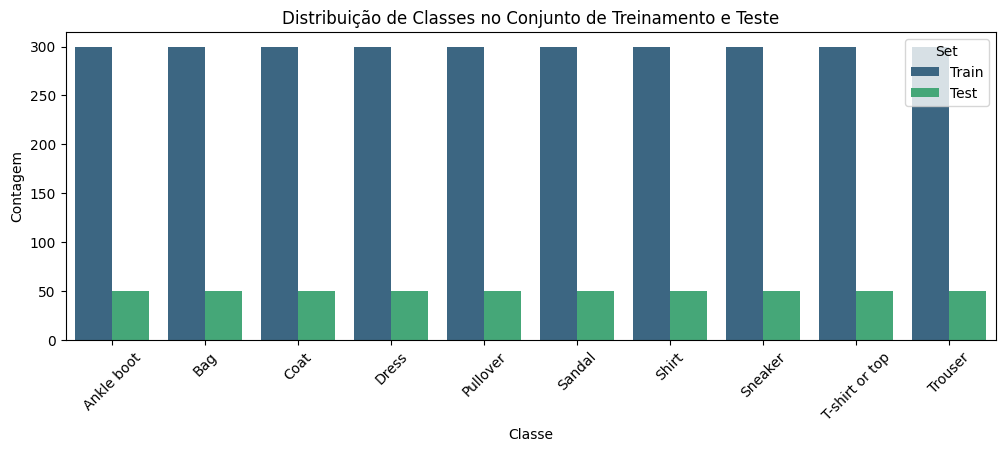

In [9]:
# Criar DataFrames para facilitar a plotagem com seaborn
train_df = pd.DataFrame({
    'Class': train_unique_values,
    'Count': train_counts,
    'Set': 'Train'
})

test_df = pd.DataFrame({
    'Class': test_unique_values,
    'Count': test_counts,
    'Set': 'Test'
})

# Combinar os DataFrames de treinamento e teste
combined_df = pd.concat([train_df, test_df])

# Plotar a distribuição das classes no conjunto de treinamento e teste
plt.figure(figsize=(12, 4))
sns.barplot(x='Class', y='Count', hue='Set', data=combined_df, palette='viridis')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.title('Distribuição de Classes no Conjunto de Treinamento e Teste')
plt.xticks(rotation=45)
plt.show()

Perfeitamente Balanceado!

#Vetorizar as Imagens e Treinar um Modelo KNN
Para simplificar, vamos vetorizar os pixels das imagens. No entanto, para melhores resultados, a extração de atributos (como SIFT, HOG) pode ser utilizada.

In [10]:
x_train.shape

(3000, 28, 28)

In [11]:
# Vetorizar as imagens
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

In [12]:
x_test_flat.shape

(500, 784)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, confusion_matrix

# Treinar o modelo KNN
def train_and_predict(x_train, y_train, x_test, n_neighbors=5):
  model = KNeighborsClassifier(n_neighbors=n_neighbors)
  model.fit(x_train, y_train.flatten())

  # Inferir
  y_pred = model.predict(x_test)

  return model, y_pred

model, y_pred = train_and_predict(x_train_flat, y_train, x_test_flat)

Acurácia: 0.808
Kappa: 0.7866666666666667
F1 score: 0.8082094954113125


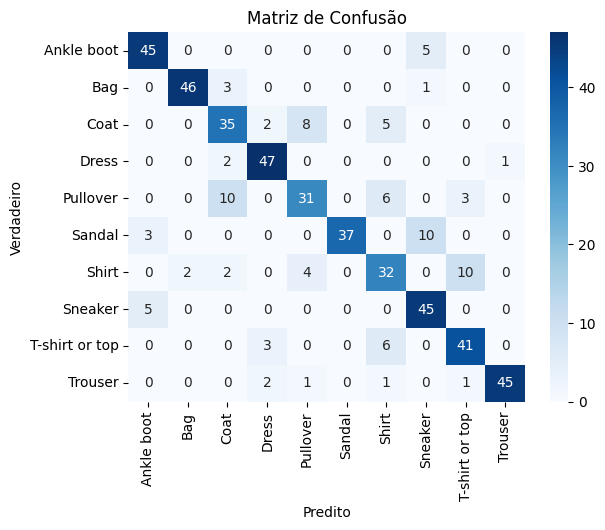

In [14]:
def evaluate(y_test, y_pred):

  # Métricas
  print('Acurácia:', accuracy_score(y_test, y_pred))
  print('Kappa:', cohen_kappa_score(y_test, y_pred))
  print('F1 score:', f1_score(y_test, y_pred, average='weighted'))

  # Plotar matriz de confusão
  conf_matrix = confusion_matrix(y_test, y_pred)

  sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
  plt.title('Matriz de Confusão')
  plt.xlabel('Predito')
  plt.ylabel('Verdadeiro')
  plt.show()

evaluate(y_test, y_pred)

##Análise dos Erros

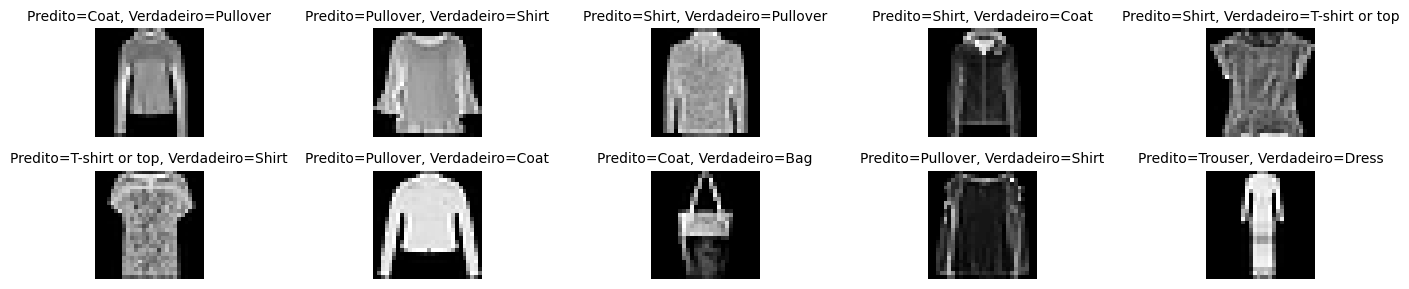

In [15]:
# Filtrar previsões incorretas
incorrect_indices = np.where(y_pred != y_test)[0]

# Se houver previsões incorretas, selecione até 10 para exibir
num_images_to_show = min(10, len(incorrect_indices))
if num_images_to_show > 0:
    plt.figure(figsize=(15, 3))
    for i in range(num_images_to_show):
        incorrect_index = incorrect_indices[i]
        incorrect_image = x_test[incorrect_index]
        true_label = y_test[incorrect_index]
        predicted_label = y_pred[incorrect_index]

        plt.subplot(2, 5, i + 1)
        plt.imshow(incorrect_image, cmap='gray')
        plt.title(f'Predito={predicted_label}, Verdadeiro={true_label}', fontsize=10)
        plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("Nenhuma previsão incorreta encontrada.")

##Analisar Probabilities

In [16]:
# Criar DataFrame com informações das previsões incorretas
incorrect_predictions = []
probabilities = model.predict_proba(x_test_flat)

for i in incorrect_indices:
    true_label = y_test[i]
    predicted_label = y_pred[i]
    row = {
        'indice': i,
        'true': true_label,
        'pred': predicted_label
    }
    # Adicionar as probabilidades para cada classe
    for class_index in range(10):
        row[f'proba_{class_index}'] = probabilities[i, class_index]
    incorrect_predictions.append(row)

df_incorrect_predictions = pd.DataFrame(incorrect_predictions)

# Exibir o DataFrame
df_incorrect_predictions.head(10)

,indice,true,pred,proba_0,proba_1,proba_2,proba_3,proba_4,proba_5,proba_6,proba_7,proba_8,proba_9
0,12,Pullover,Coat,0.0,0.0,0.6,0.0,0.4,0.0,0.0,0.0,0.0,0.0
1,36,Shirt,Pullover,0.0,0.0,0.0,0.0,0.4,0.0,0.4,0.0,0.2,0.0
2,50,Pullover,Shirt,0.0,0.0,0.0,0.0,0.2,0.0,0.8,0.0,0.0,0.0
3,52,Coat,Shirt,0.0,0.0,0.2,0.0,0.0,0.0,0.8,0.0,0.0,0.0
4,63,T-shirt or top,Shirt,0.0,0.0,0.0,0.0,0.2,0.0,0.4,0.0,0.4,0.0
5,71,Shirt,T-shirt or top,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.8,0.0
6,73,Coat,Pullover,0.0,0.0,0.2,0.0,0.4,0.0,0.4,0.0,0.0,0.0
7,77,Bag,Coat,0.0,0.0,0.4,0.2,0.0,0.0,0.0,0.0,0.4,0.0
8,78,Shirt,Pullover,0.0,0.0,0.0,0.0,0.8,0.0,0.2,0.0,0.0,0.0
9,93,Dress,Trouser,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.8


#Normalização das Imagens e Retreinamento

In [17]:
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

In [18]:
# Vetorizar as imagens
x_train_flat = x_train_normalized.reshape(x_train_normalized.shape[0], -1)
x_test_flat = x_test_normalized.reshape(x_test_normalized.shape[0], -1)

Acurácia: 0.808
Kappa: 0.7866666666666667
F1 score: 0.8082094954113125


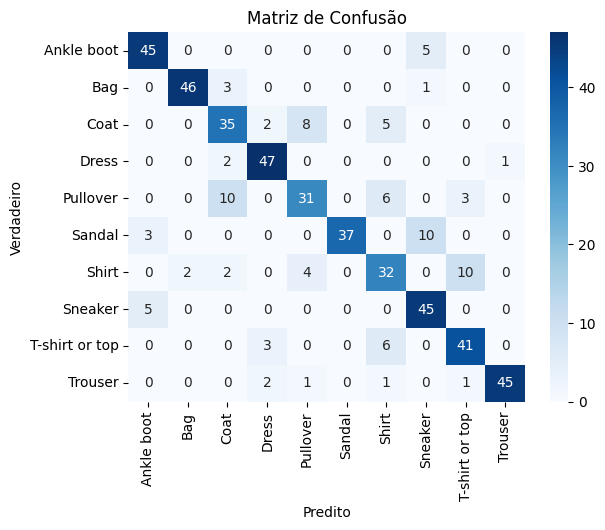

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

model, y_pred = train_and_predict(x_train_flat, y_train, x_test_flat)
evaluate(y_test, y_pred)

#PCA para Redução de Dimensionalidade e Retreinamento

In [20]:
from sklearn.decomposition import PCA

n_components = 200
pca = PCA(n_components=n_components)
x_train_pca = pca.fit_transform(x_train_flat)
x_test_pca = pca.transform(x_test_flat)

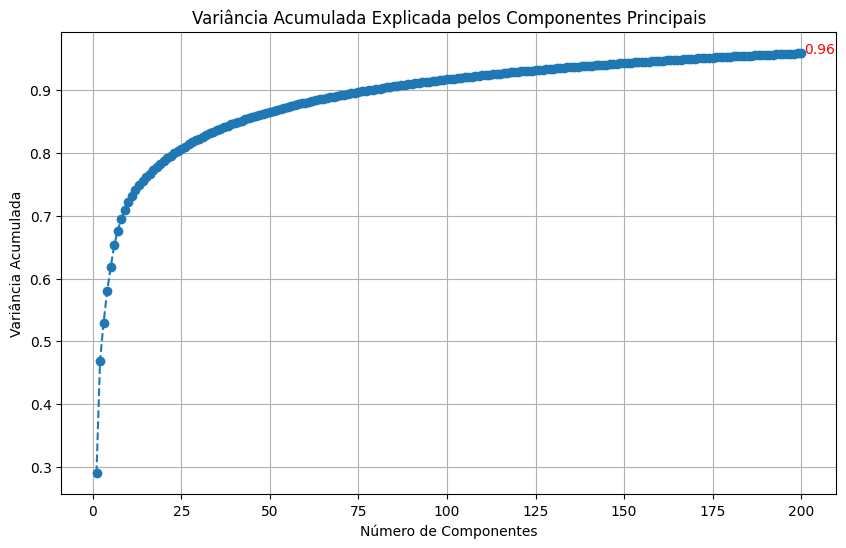

In [21]:
# Plotar variância acumulada
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Acumulada')
plt.title('Variância Acumulada Explicada pelos Componentes Principais')
plt.annotate("{:.2f}".format(cumulative_variance[-1]), xy=(n_components+1, cumulative_variance[-1]), color='red')
plt.grid(True)

Acurácia: 0.82
Kappa: 0.8
F1 score: 0.8198495864796109


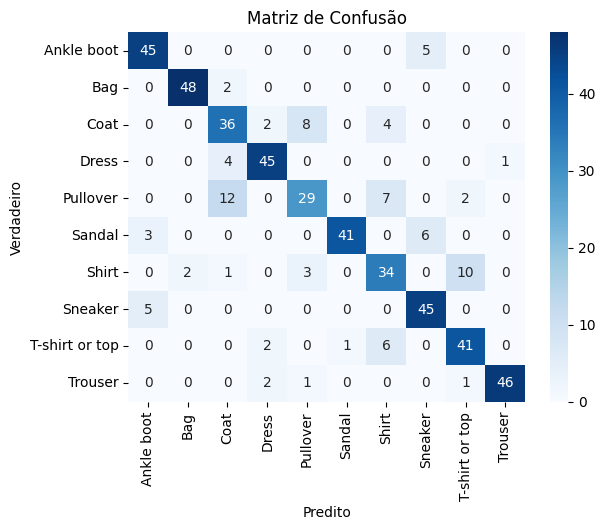

In [22]:
# Treinar o modelo SVM
model, y_pred = train_and_predict(x_train_pca, y_train, x_test_pca)
evaluate(y_test, y_pred)

#Aplicação de CLAHE e Retreino

In [23]:
import cv2

# Função para aplicar CLAHE à imagens
def apply_clahe(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    image_clahe = clahe.apply(image)
    return image_clahe

# Aplicar CLAHE em um subconjunto de treinamento e teste para exemplo
x_train_clahe = np.array([apply_clahe(img) for img in x_train])
x_test_clahe = np.array([apply_clahe(img) for img in x_test])

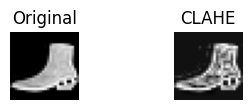

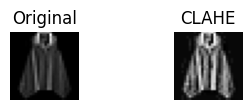

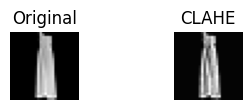

In [24]:
# Plotar a imagem original e a imagem com CLAHE aplicados lado a lado
image_idx = range(3)  # Substitua pelos índices da imagem que deseja visualizar

for i in image_idx:
  plt.figure(figsize=(3, 3))

  # Imagem original
  plt.subplot(1, 3, 1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title('Original')
  plt.axis('off')

  # Imagem com CLAHE aplicado
  plt.subplot(1, 3, 3)
  plt.imshow(x_train_clahe[i], cmap='gray')
  plt.title('CLAHE')
  plt.axis('off')

  plt.show()

As imagens do Fashion MNIST são relativamente simples e de baixo contraste. O CLAHE pode melhorar o contraste, mas também pode introduzir artefatos que não são desejáveis. A avaliação se vale ou não a pena deve ser decidida empiricamente!

In [25]:
# Normalização
x_train_clahe = x_train_clahe.astype('float32') / 255.0
x_test_clahe = x_test_clahe.astype('float32') / 255.0

Acurácia: 0.824
Kappa: 0.8044444444444445
F1 score: 0.8236580872186041


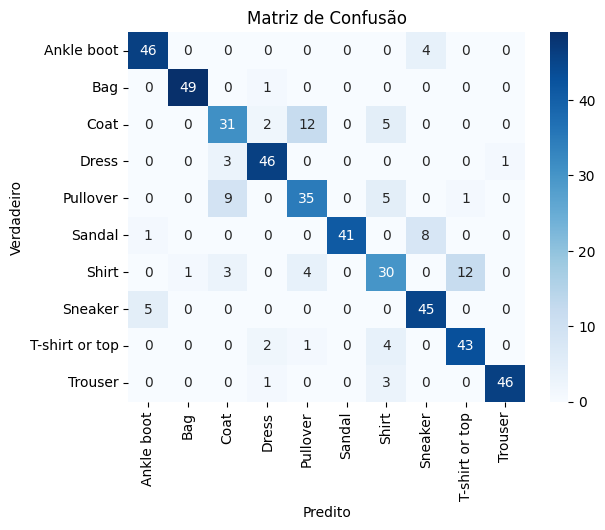

In [26]:
# Treinar o modelo SVM
x_train_flat = x_train_clahe.reshape(x_train_clahe.shape[0], -1)
x_test_flat = x_test_clahe.reshape(x_test_clahe.shape[0], -1)

model, y_pred = train_and_predict(x_train_flat, y_train, x_test_flat)
evaluate(y_test, y_pred)

#PCA para Redução de Dimensionalidade e Retreino (CLAHE)

In [27]:
pca = PCA(n_components=n_components)
x_train_pca = pca.fit_transform(x_train_flat)
x_test_pca = pca.transform(x_test_flat)

In [28]:
x_train_pca.shape

(3000, 200)

Acurácia: 0.834
Kappa: 0.8155555555555556
F1 score: 0.8340374728336718


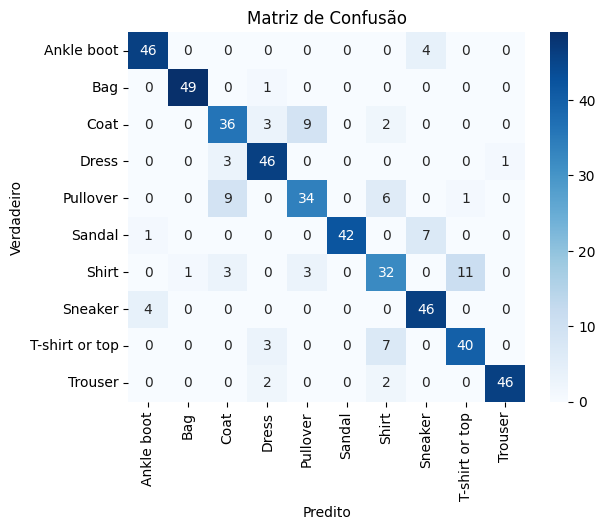

In [29]:
# Treinar o modelo SVM
model, y_pred = train_and_predict(x_train_pca, y_train, x_test_pca)
evaluate(y_test, y_pred)

Acurácia: 0.84
Kappa: 0.8222222222222222
F1 score: 0.8396635412061132


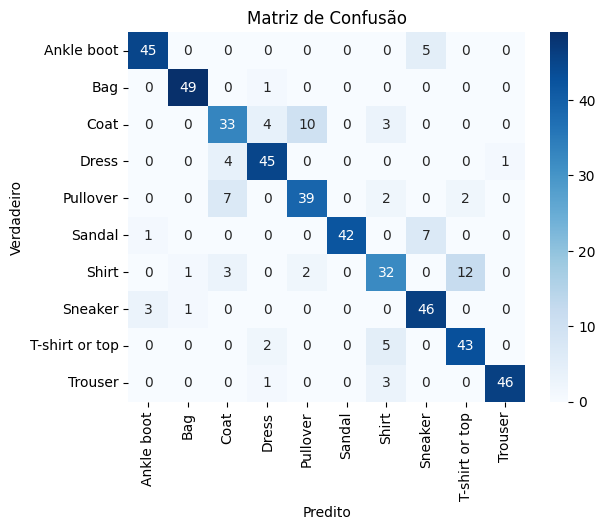

In [30]:
model, y_pred = train_and_predict(x_train_pca, y_train, x_test_pca, 9)
evaluate(y_test, y_pred)

Fine tuning: mais pra frente avaliaremos o uso de GridSearch e de pacotes que usam otimizadores, como o Optuna.

# Salvar melhor modelo e pré processamentos

In [33]:
import joblib
from sklearn.pipeline import Pipeline

# Criar o pipeline de pré-processamento e modelo
pipeline = Pipeline([('pca', pca),
                     ('model', model)])

In [34]:
# Salvar o pipeline completo
joblib_file = "pipeline.pkl"
joblib.dump(pipeline, joblib_file)

print(f"Pipeline salvo em {joblib_file}")

Pipeline salvo em pipeline.pkl
